In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [3]:
import re

In [2]:
df = pd.read_excel('all_scrapers.xls')

In [112]:
df.describe()

,forks_count,stargazers_count,watchers_count,size,open_issues_count,has_downloads,score,is_py
count,17366.000000,17366.000000,17366.000000,17366.000000,17366.000000,17366,17366.000000,17366.000000
mean,0.848497,3.580675,3.580675,2415.881262,0.296902,0.996545,2.197762,0.349706
std,23.249560,94.529315,94.529315,29507.277134,3.401048,0.05867954,2.242956,0.476891
min,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.098267,0.000000
25%,0.000000,0.000000,0.000000,116.000000,0.000000,1,0.902653,0.000000
50%,0.000000,0.000000,0.000000,148.000000,0.000000,1,1.772090,0.000000
75%,0.000000,1.000000,1.000000,300.000000,0.000000,1,2.480904,1.000000
max,2832.000000,9914.000000,9914.000000,1754636.000000,290.000000,True,74.710110,1.000000


In [4]:
users = []
for i in df.full_name:
    if i:
        users.append(re.findall(r'^(\S+)/',str(i))[0])
    else:
        users.append('None')
    

In [6]:
df['users'] = users

In [16]:
df['created_at'][0][0:6]

u'2014-0'

In [17]:
df['create_ym'] = df.created_at.apply(lambda x: x[0:7])

In [96]:
df #i already set users as index

,users,name,description,html_url,forks_count,stargazers_count,watchers_count,updated_at,created_at,size,open_issues_count,has_downloads,score,language,full_name,create_ym,CohortGroup
0,openeventdata,scraper,Scrapes sites. Gets news. Eventually events.,https://github.com/openeventdata/scraper,22,21,21,2015-08-07T12:29:22Z,2014-01-26T01:18:53Z,520,2,True,46.280060,Python,openeventdata/scraper,2014-01,2014-01
1,NikolaiT,GoogleScraper,A Python module to scrape several search engin...,https://github.com/NikolaiT/GoogleScraper,161,620,620,2015-08-17T11:59:36Z,2013-12-06T15:34:20Z,17215,52,True,35.007828,HTML,NikolaiT/GoogleScraper,2013-12,2013-12
2,ivolo,scraper,A simple API for phantom web scraping,https://github.com/ivolo/scraper,2,7,7,2015-01-27T19:46:35Z,2014-01-12T02:18:44Z,166,4,True,25.522753,JavaScript,ivolo/scraper,2014-01,2014-01
3,cleure,Amazon-Scraper,Amazon Price scraping tool,https://github.com/cleure/Amazon-Scraper,4,11,11,2015-07-19T10:03:53Z,2013-11-04T23:52:37Z,356,0,True,19.099678,Python,cleure/Amazon-Scraper,2013-11,2013-11
4,sap1ens,scraper,"Scraper example built on Scala, Akka and Jsoup",https://github.com/sap1ens/scraper,5,9,9,2015-07-19T04:38:06Z,2013-10-31T04:11:07Z,185,0,True,19.032696,Scala,sap1ens/scraper,2013-10,2013-10
5,tounano,form-scraper,A JS module that helps with Form scraping and ...,https://github.com/tounano/form-scraper,6,8,8,2015-08-18T08:18:43Z,2013-12-20T15:28:11Z,190,1,True,19.018940,JavaScript,tounano/form-scraper,2013-12,2013-12
6,abelsonlive,scrape-the-gibson,Code snippets for a workshop on web scraping.,https://github.com/abelsonlive/scrape-the-gibson,9,22,22,2015-07-11T07:53:06Z,2013-12-04T15:21:51Z,180,0,True,12.688292,Python,abelsonlive/scrape-the-gibson,2013-12,2013-12
7,Genius,trackback_scraper,NaN,https://github.com/Genius/trackback_scraper,12,118,118,2015-07-16T14:20:18Z,2013-12-30T16:57:18Z,141,0,True,12.162844,Ruby,Genius/trackback_scraper,2013-12,2013-12
8,martinsbalodis,web-scraper-chrome-extension,Web data extraction tool implemented as chrome...,https://github.com/martinsbalodis/web-scraper-...,63,205,205,2015-08-20T00:13:09Z,2013-11-23T19:14:29Z,2322,57,True,12.162844,JavaScript,martinsbalodis/web-scraper-chrome-extension,2013-11,2013-11
9,iandees,social_scrapers,Various Python scripts to scrape sites that st...,https://github.com/iandees/social_scrapers,3,20,20,2015-07-21T19:15:58Z,2014-01-06T17:29:39Z,136,0,True,11.823298,Python,iandees/social_scrapers,2014-01,2013-07


In [18]:
df['CohortGroup'] = df.groupby(level=0)['created_at'].min().apply(lambda x: x[0:7])
df.reset_index(inplace=True)

In [ ]:
# first repo lang per usr, first convert, number of convert
# percent of converts lang.min != other lang

In [ ]:
#there were no APIs in 2008!!!
#visua.ly opengov partnership

In [21]:
grouped = df.groupby(['CohortGroup', 'create_ym'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'users': pd.Series.nunique,
                       'full_name': pd.Series.nunique,
                       'language': np.max})

# make the column names more meaningful
cohorts.rename(columns={'users': 'TotalUsers',
                        'full_name': 'TotalOrders'}, inplace=True)
cohorts

language  TotalUsers  TotalOrders
CohortGroup create_ym                                       
2008-03     2008-03          Python           2            3
2008-04     2008-04            Ruby           2            2
2008-06     2008-06            Ruby           2            2
2008-07     2008-07            Ruby           6            6
2008-08     2008-08            Ruby           6            6
            2008-09            Ruby           1            1
            2009-07            Ruby           1            1
            2014-02             NaN           1            1
            2014-07            Ruby           2            2
2008-09     2008-09            Ruby           2            2
2008-10     2008-10            Ruby           6            6
2008-11     2008-11            Ruby           5            5
2008-12     2008-12            Ruby           8            8
2009-01     2009-01            Ruby          14           17
            2009-05            Ruby           1            1
            2011-10             PHP           1            1
2009-02     2009-02            Ruby          11           12
            2009-03            Ruby           1            1
            2010-03            Ruby           1            2
            2010-07            HTML           1            1
            2011-03          Python           1            1
            2011-05            Perl           1            1
            2011-09          Python           1            1
            2014-08          Python           1            1
            2015-02          Python           1            1
            2015-05          Python           1            1
2009-03     2009-03            Ruby          16           16
            2010-08            Ruby           1            1
2009-04     2009-04            Ruby          12           12
            2012-09      JavaScript           1            1
...                             ...         ...          ...
2015-01     2015-07          Python           5            6
            2015-08               R           3            3
2015-02     2015-02             XML         546          580
            2015-03            Ruby          11           14
            2015-04          Python           2            3
            2015-05            Ruby           6            7
            2015-06            Ruby           5            5
            2015-07               R           3            3
            2015-08            Ruby           3            4
2015-03     2015-03           Swift         570          598
            2015-04          Python          18           18
            2015-05           Shell           9           11
            2015-06           Shell           7            8
            2015-07          Python           3            3
            2015-08            HTML           3            3
2015-04     2015-04           Swift         555          584
            2015-05          Python          10           12
            2015-06          Python           6            6
            2015-07          Python           4            6
            2015-08      JavaScript           1            1
2015-05     2015-05           Shell         590          616
            2015-06            Ruby          18           20
            2015-07          Python           4            4
            2015-08          Python           4            4
2015-06     2015-06    Visual Basic         551          580
            2015-07          Python          10           10
            2015-08      JavaScript           2            7
2015-07     2015-07    Visual Basic         652          684
            2015-08          Python          13           16
2015-08     2015-08           Swift         419          445

[962 rows x 3 columns]

In [ ]:
#why swift to scrape html? responsive web hasnt take off, no APIs

In [48]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'create_ym'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size

CohortGroup
2008-03      2
2008-04      2
2008-06      2
2008-07      6
2008-08      6
2008-09      2
2008-10      6
2008-11      5
2008-12      8
2009-01     14
2009-02     11
2009-03     16
2009-04     12
2009-05      8
2009-06     10
2009-07     11
2009-08     23
2009-09     11
2009-10     12
2009-11     10
2009-12     13
2010-01     22
2010-02     17
2010-03     20
2010-04     21
2010-05     21
2010-06     24
2010-07     19
2010-08     30
2010-09     28
          ... 
2013-03    213
2013-04    197
2013-05    227
2013-06    214
2013-07    227
2013-08    229
2013-09    228
2013-10    243
2013-11    279
2013-12    229
2014-01    291
2014-02    353
2014-03    353
2014-04    333
2014-05    370
2014-06    357
2014-07    359
2014-08    357
2014-09    400
2014-10    488
2014-11    417
2014-12    442
2015-01    524
2015-02    546
2015-03    570
2015-04    555
2015-05    590
2015-06    551
2015-07    652
2015-08    419
Name: TotalUsers, dtype: int64

In [49]:
cohorts['TotalUsers'].unstack(0)
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

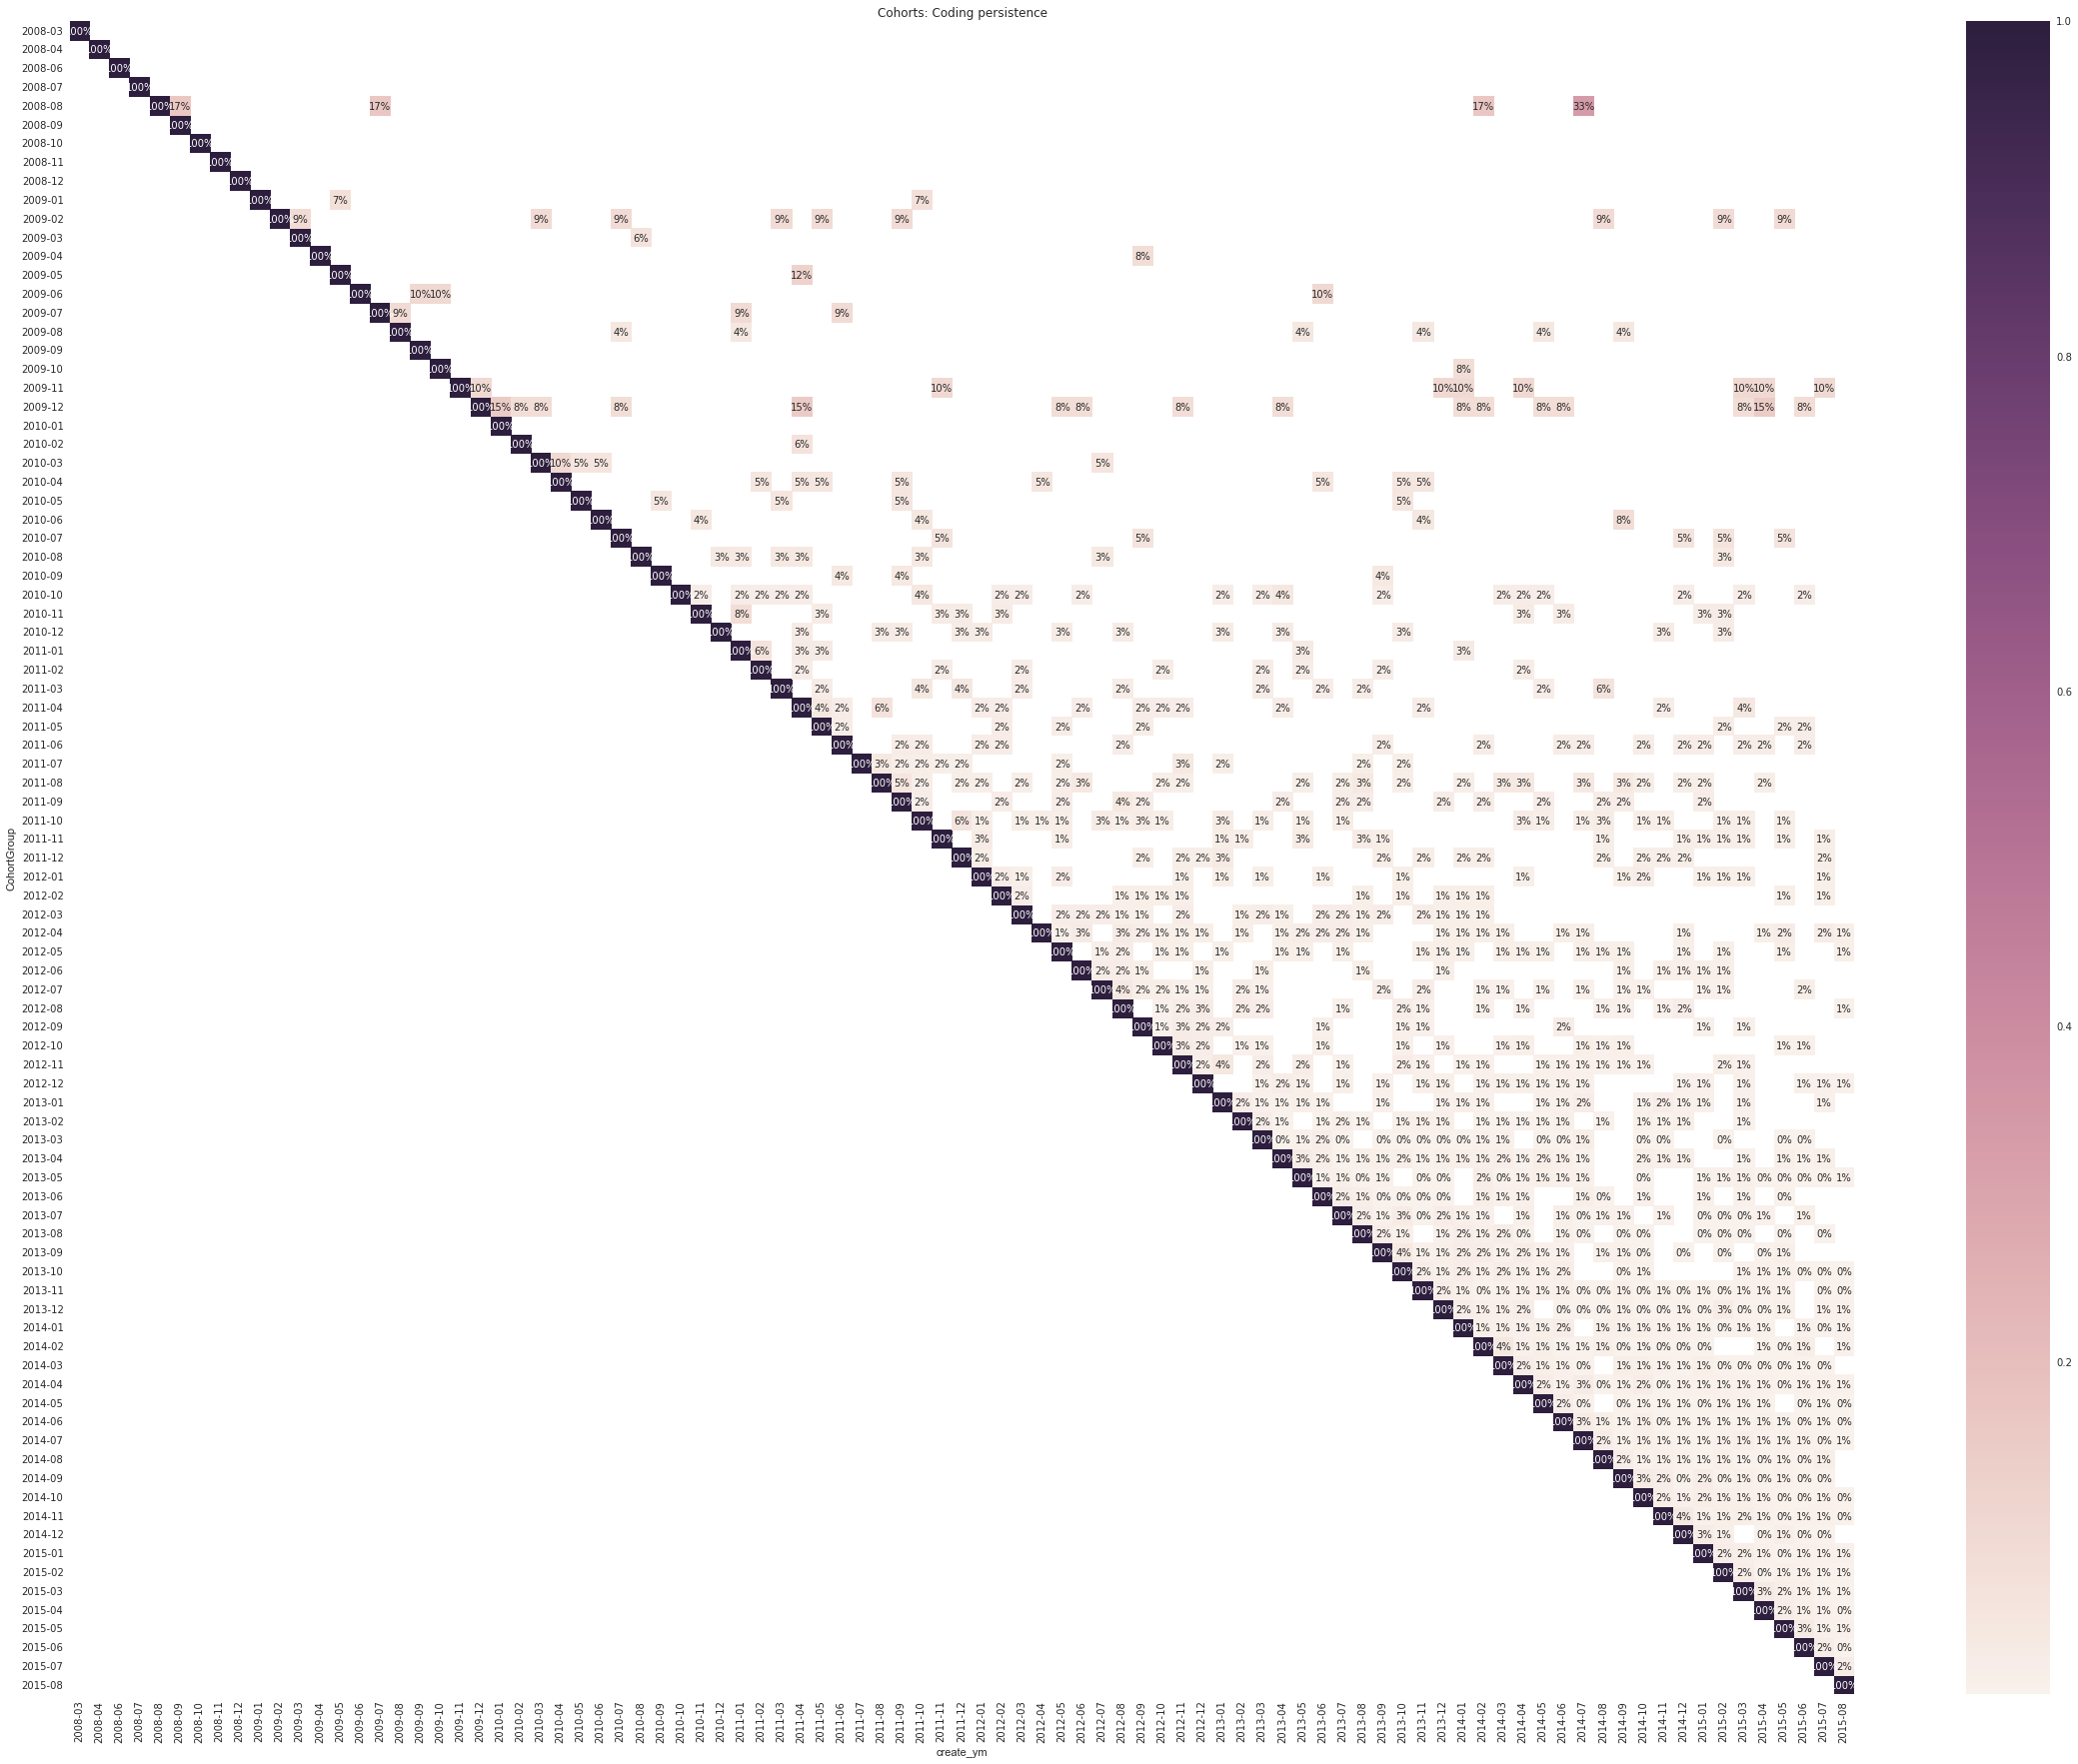

In [61]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(40, 30))
plt.title('Cohorts: Coding persistence')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%')

In [ ]:
Theres a small community at the end of 2009 that continued to write scapers over the years

In [100]:
df['is_py'] = df['language'].apply(lambda x: 1 if x == 'Python' else 0)

In [104]:
groupedpy = df.groupby(['CohortGroup', 'create_ym'])

# count the unique users, orders, and total revenue per Group + Period
cohortspy = groupedpy.agg({'users': pd.Series.nunique,
                       'full_name': pd.Series.nunique,
                       'is_py': np.sum})

# make the column names more meaningful
cohortspy.rename(columns={'users': 'TotalUsers',
                        'full_name': 'TotalRepos',
                         'is_py':'TotalPyUsrs'}, inplace=True)
cohortspy

TotalPyUsrs  TotalUsers  TotalRepos
CohortGroup create_ym                                     
2008-03     2008-03              2           2           3
2008-04     2008-04              1           2           2
2008-06     2008-06              0           2           2
2008-07     2008-07              1           6           6
2008-08     2008-08              0           6           6
            2008-09              0           1           1
            2009-07              0           1           1
            2014-02              0           1           1
            2014-07              0           2           2
2008-09     2008-09              0           2           2
2008-10     2008-10              0           6           6
2008-11     2008-11              0           5           5
2008-12     2008-12              1           8           8
2009-01     2009-01              3          14          17
            2009-05              0           1           1
            2011-10              0           1           1
2009-02     2009-02              4          11          12
            2009-03              0           1           1
            2010-03              0           1           2
            2010-07              0           1           1
            2011-03              1           1           1
            2011-05              0           1           1
            2011-09              1           1           1
            2014-08              1           1           1
            2015-02              1           1           1
            2015-05              1           1           1
2009-03     2009-03              1          16          16
            2010-08              0           1           1
2009-04     2009-04              1          12          12
            2012-09              0           1           1
...                            ...         ...         ...
2015-01     2015-07              3           5           6
            2015-08              1           3           3
2015-02     2015-02            211         546         580
            2015-03              4          11          14
            2015-04              2           2           3
            2015-05              1           6           7
            2015-06              1           5           5
            2015-07              1           3           3
            2015-08              1           3           4
2015-03     2015-03            240         570         598
            2015-04              8          18          18
            2015-05              3           9          11
            2015-06              2           7           8
            2015-07              1           3           3
            2015-08              0           3           3
2015-04     2015-04            233         555         584
            2015-05              6          10          12
            2015-06              4           6           6
            2015-07              2           4           6
            2015-08              0           1           1
2015-05     2015-05            235         590         616
            2015-06              7          18          20
            2015-07              2           4           4
            2015-08              2           4           4
2015-06     2015-06            217         551         580
            2015-07              4          10          10
            2015-08              0           2           7
2015-07     2015-07            273         652         684
            2015-08              4          13          16
2015-08     2015-08            158         419         445

[962 rows x 3 columns]

In [106]:
# reindex cohortspy
cohortspy.reset_index(inplace=True)
cohortspy.set_index(['CohortGroup', 'create_ym'], inplace=True)

# create a Series holding the total # of python users for each cohort
cohort_py_size = cohortspy['TotalPyUsrs'].groupby(level=0).first()
cohort_py_size

CohortGroup
2008-03      2
2008-04      1
2008-06      0
2008-07      1
2008-08      0
2008-09      0
2008-10      0
2008-11      0
2008-12      1
2009-01      3
2009-02      4
2009-03      1
2009-04      1
2009-05      4
2009-06      3
2009-07      3
2009-08      2
2009-09      3
2009-10      4
2009-11      3
2009-12      3
2010-01      3
2010-02      6
2010-03      5
2010-04      6
2010-05      7
2010-06      4
2010-07      2
2010-08      7
2010-09      8
          ... 
2013-03     86
2013-04     55
2013-05     95
2013-06     74
2013-07     92
2013-08     70
2013-09     81
2013-10     82
2013-11     82
2013-12     79
2014-01    102
2014-02    128
2014-03    139
2014-04    125
2014-05    142
2014-06    159
2014-07    170
2014-08    144
2014-09    185
2014-10    215
2014-11    168
2014-12    179
2015-01    220
2015-02    211
2015-03    240
2015-04    233
2015-05    235
2015-06    217
2015-07    273
2015-08    158
Name: TotalPyUsrs, dtype: int64

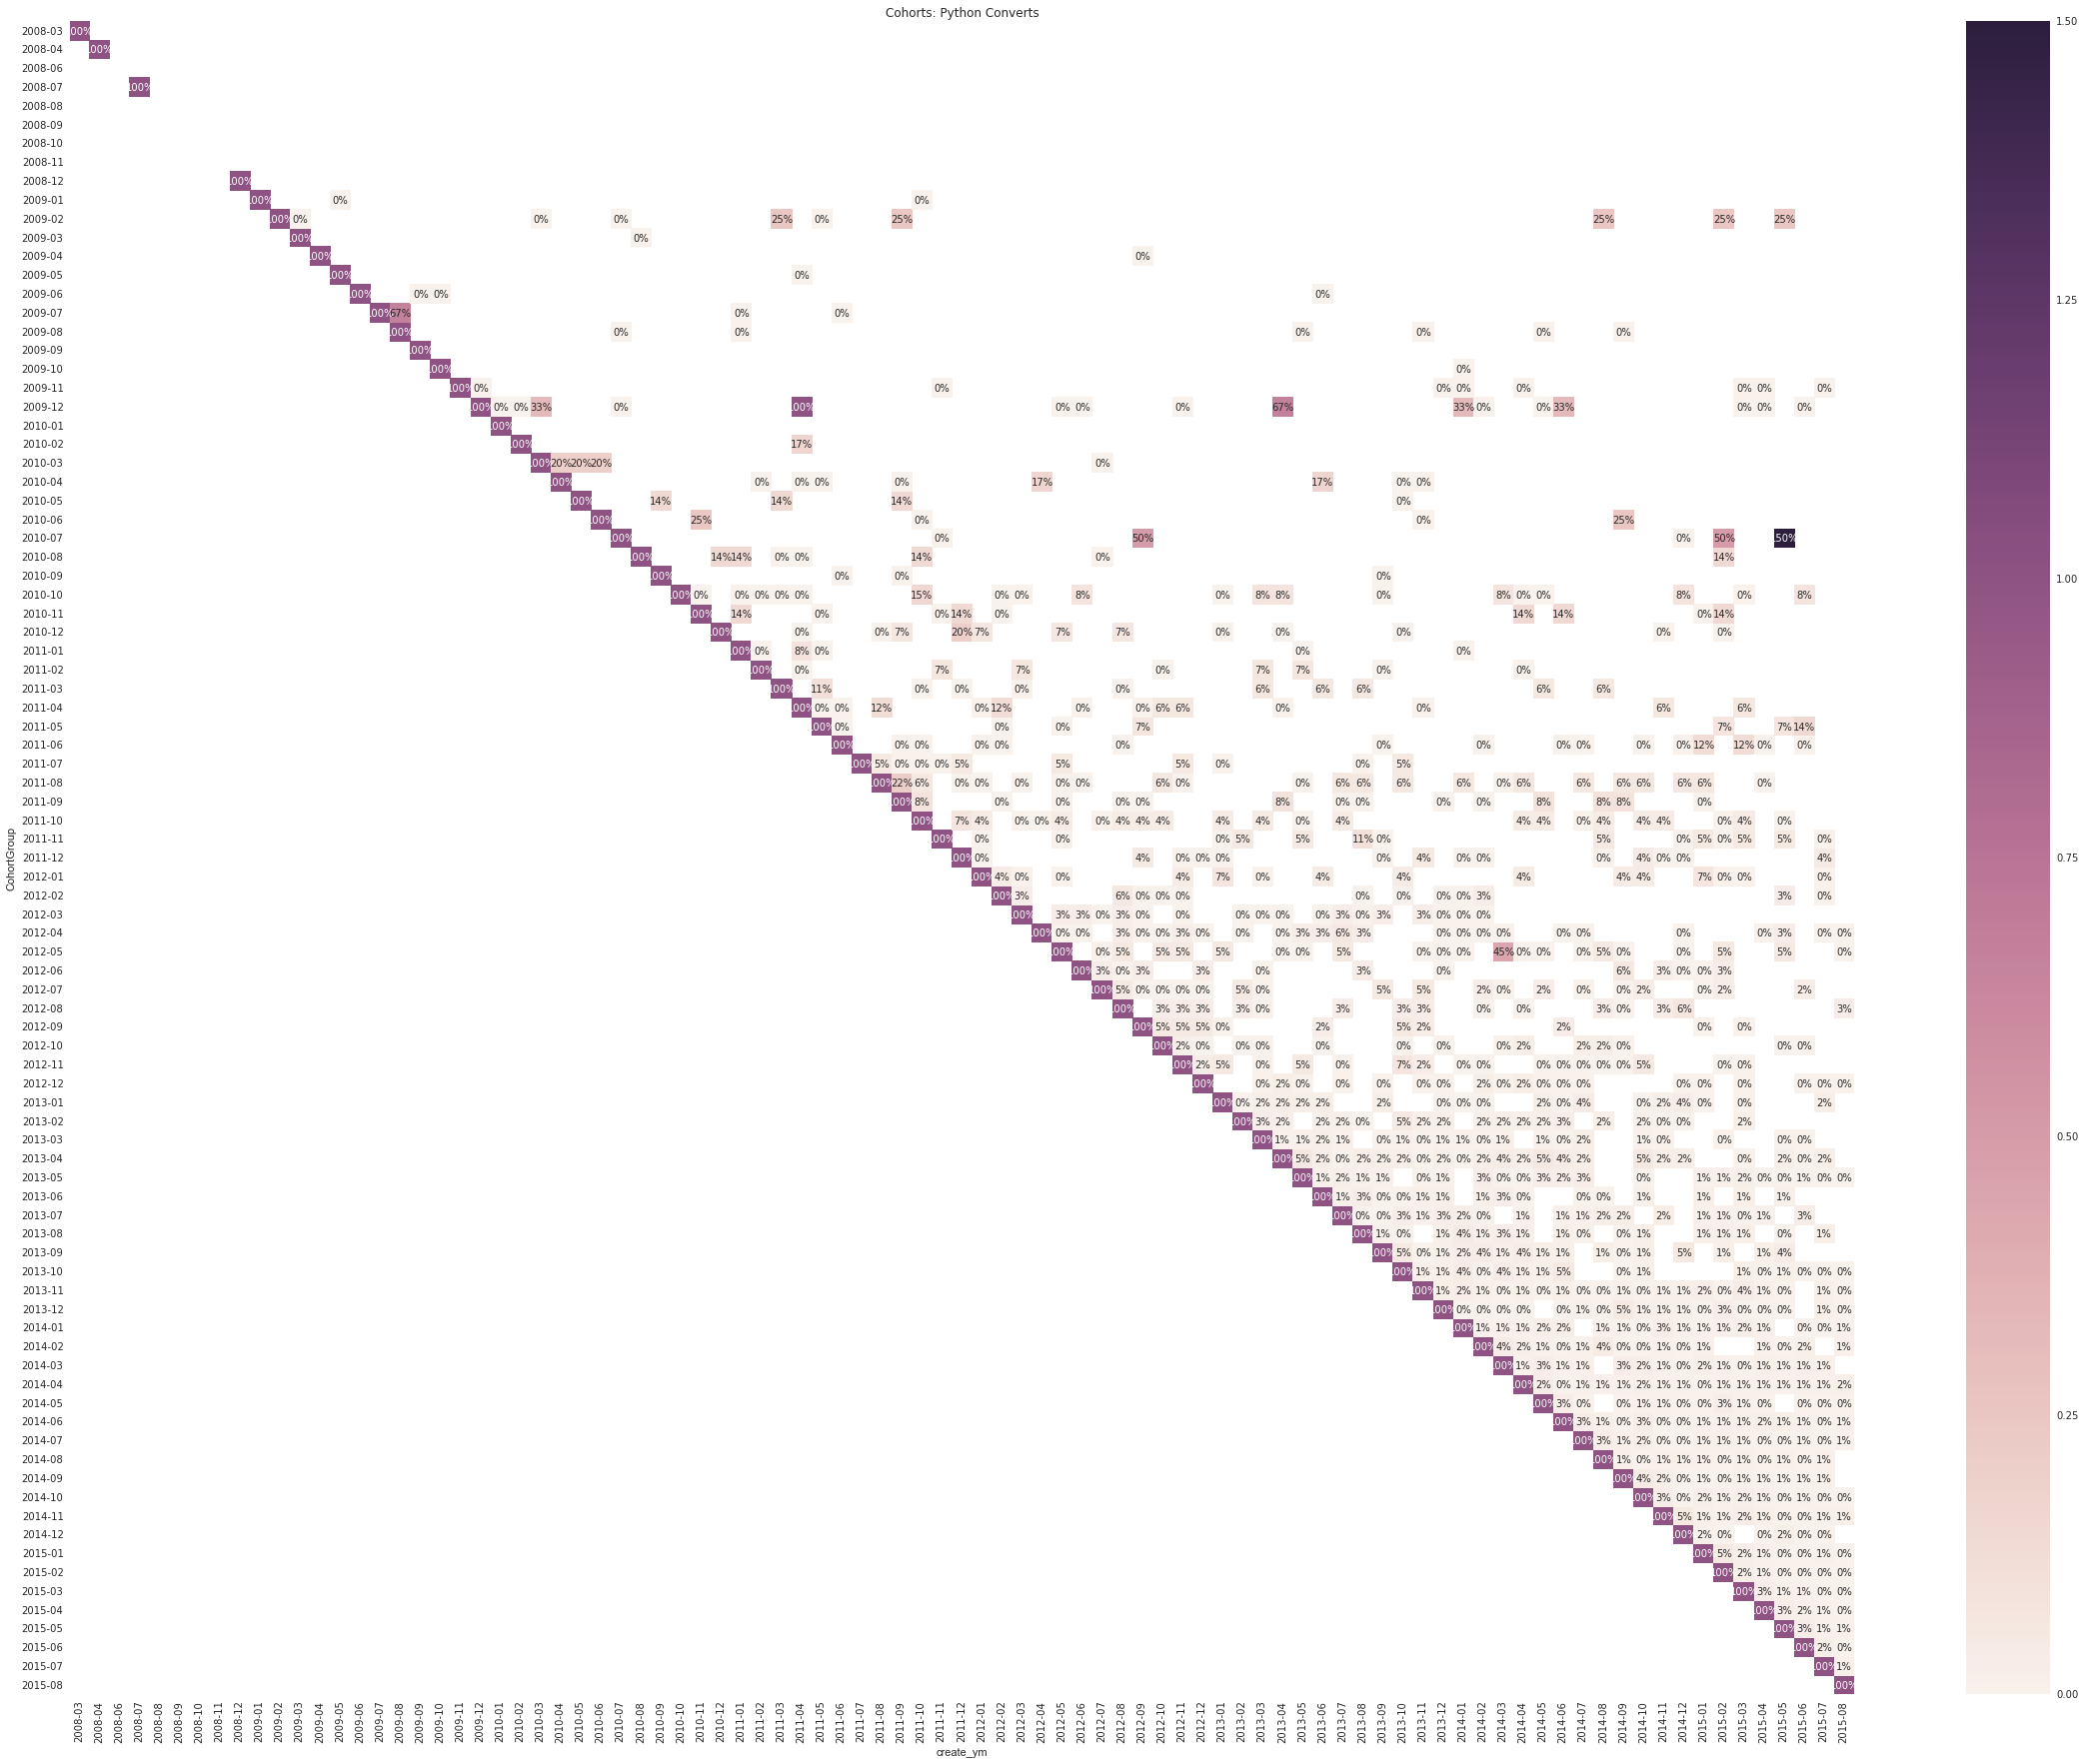

In [107]:
cohortspy['TotalPyUsrs'].unstack(0)
python_converts = cohortspy['TotalPyUsrs'].unstack(0).divide(cohort_py_size, axis=1)
plt.figure(figsize=(40, 30))
plt.title('Cohorts: Python Converts')
sns.heatmap(python_converts.T, mask=python_converts.T.isnull(), annot=True, fmt='.0%')

In [ ]:
Graphic above: Do pythonistas remain pythonistas?

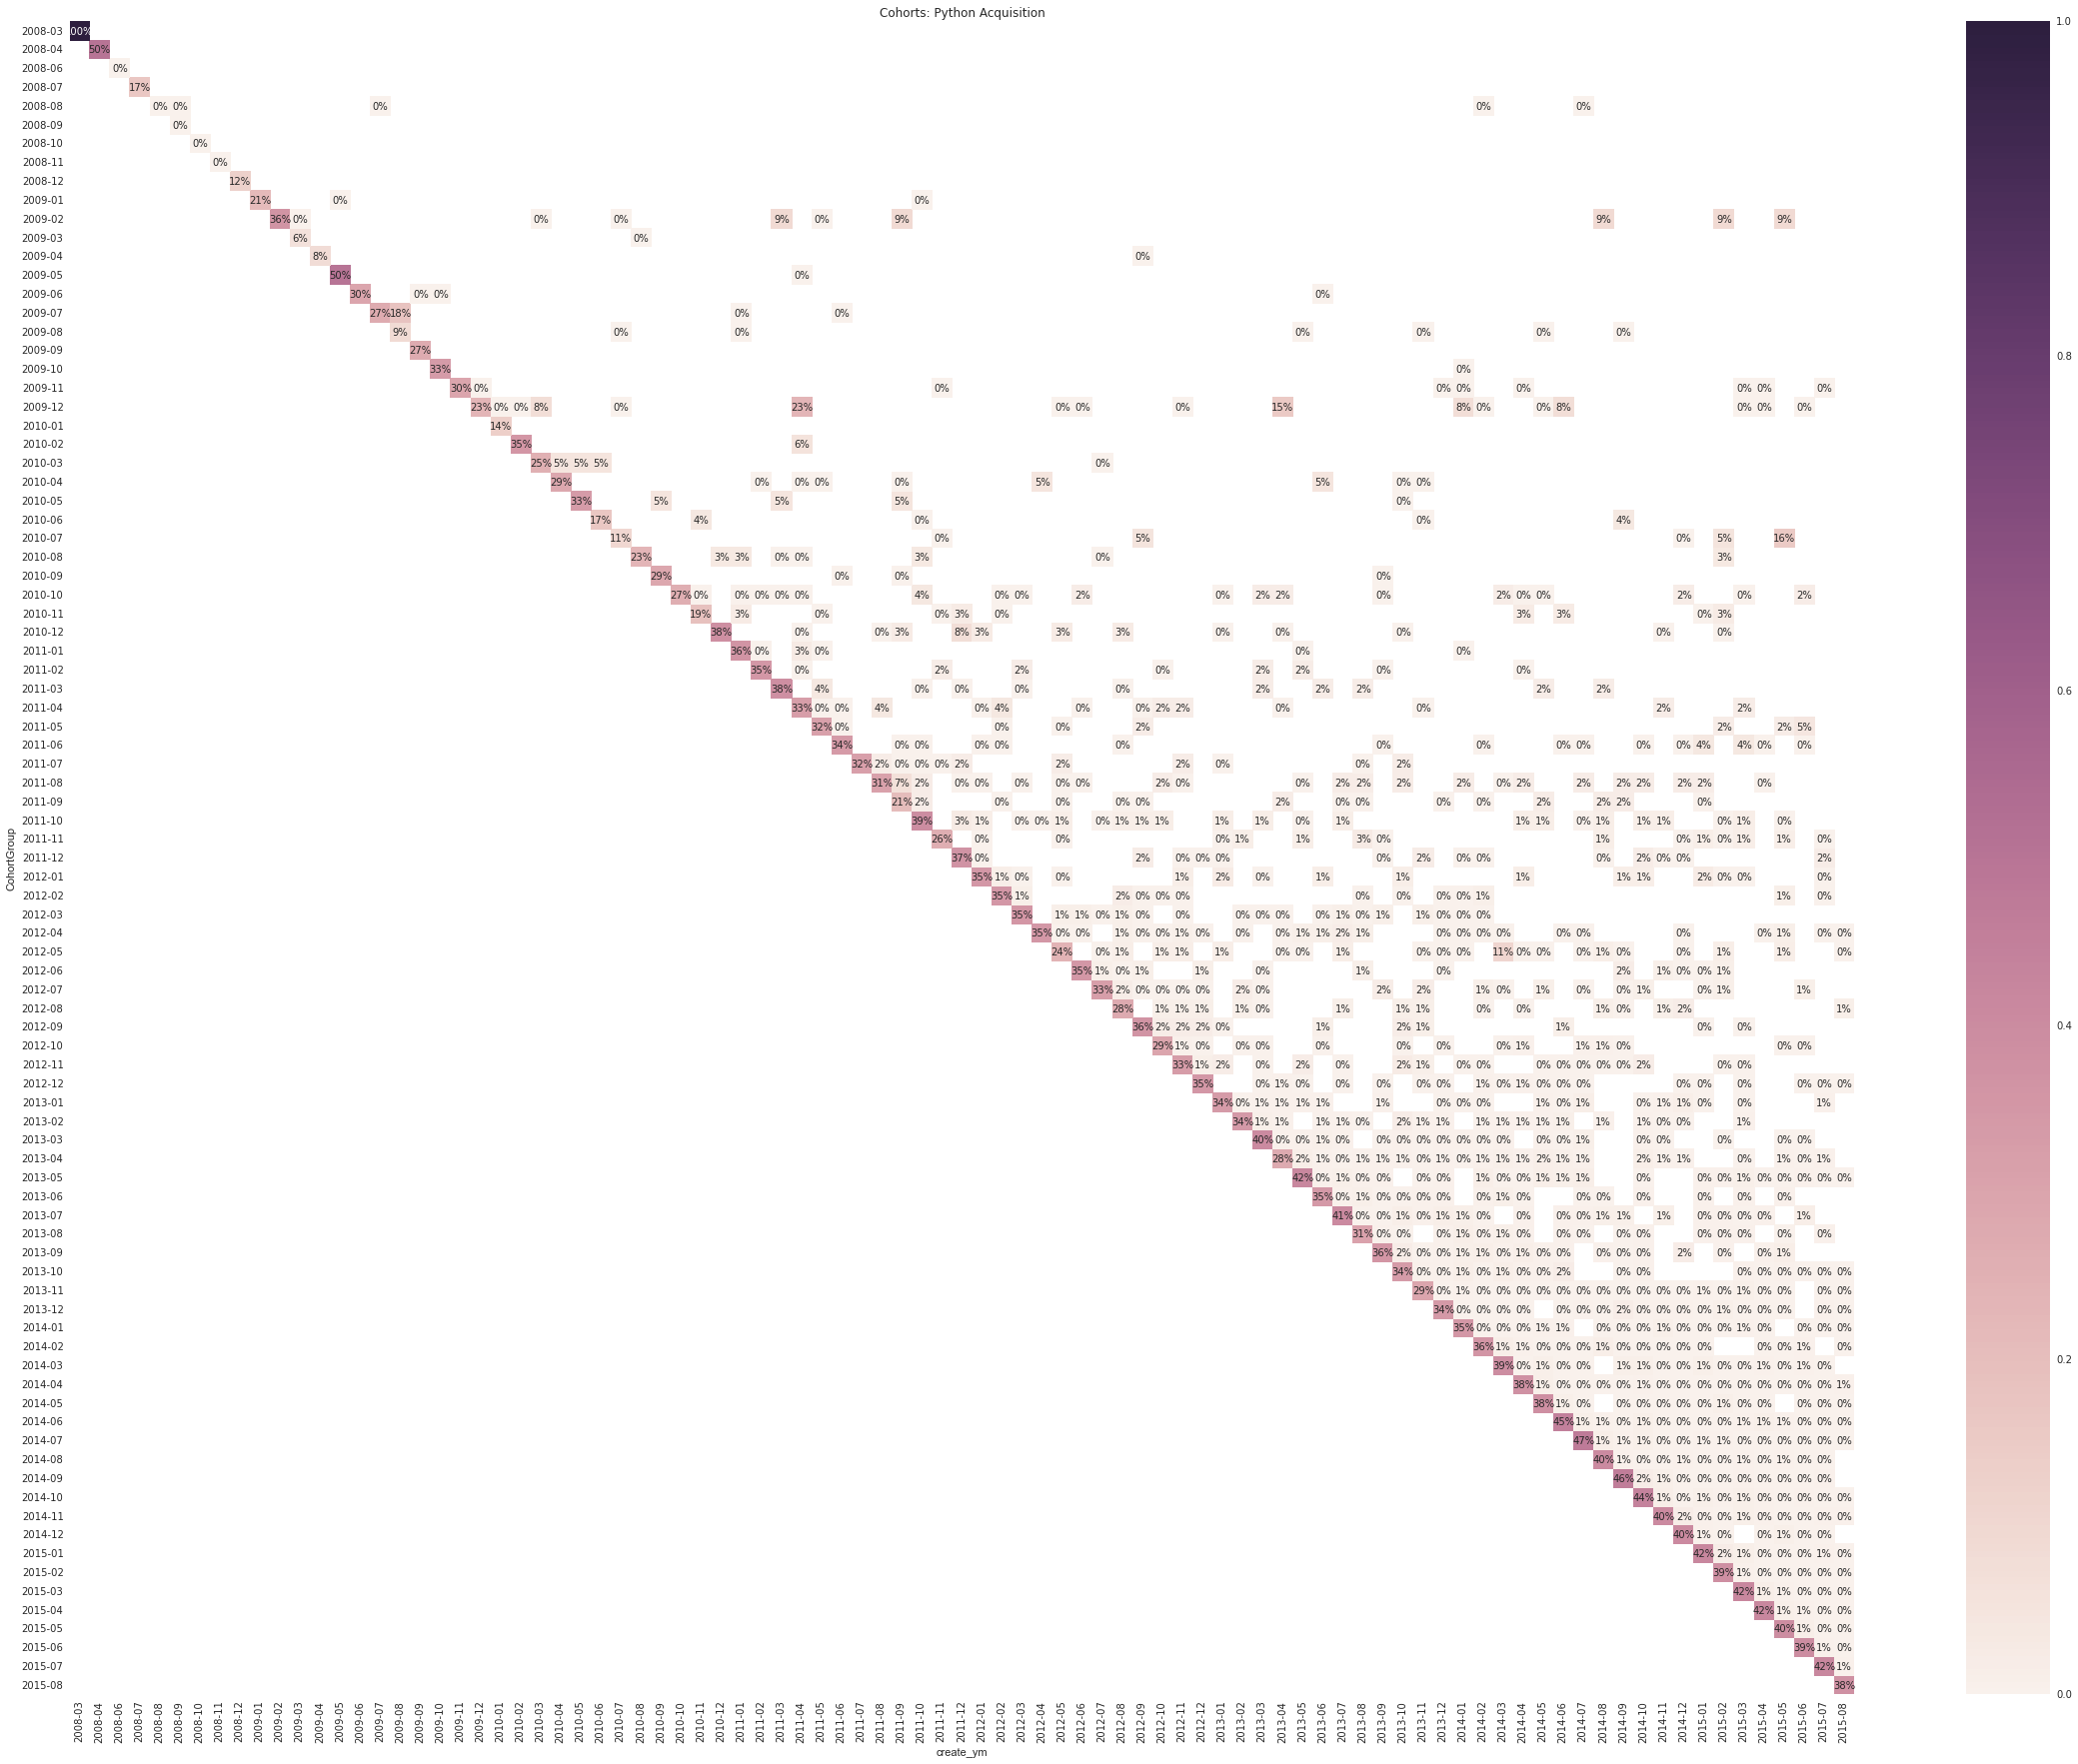

In [109]:
#Series of total users I'l use to analyze python acquisition
cohort_group_size_py = cohortspy['TotalUsers'].groupby(level=0).first()
cohortspy['TotalPyUsrs'].unstack(0)
python_acq = cohortspy['TotalPyUsrs'].unstack(0).divide(cohort_group_size_py, axis=1)
plt.figure(figsize=(40, 30))
plt.title('Cohorts: Python Acquisition')
sns.heatmap(python_acq.T, mask=python_acq.T.isnull(), annot=True, fmt='.0%')

Graphic above do coders acquire python?